In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn import preprocessing

%matplotlib inline

In [2]:
folder = 'D:\\SFL\\Biodesix\\raw data\\'
filename = 'Microflex_PIR_DataSet.xlsx'
name = folder + filename
indata = pd.read_excel(name, sheet_name="Sheet1")
print indata.shape
indata.head()

(1048, 294)


,SpecimenID,ClassifierA,ClassifierB,ClassifierC,ClassifierD,3085,3111,3137,3157,3177,...,28860,28973,29079,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293
0,Set1_1288,0.971253,0.998610,0.729931,0.885837,0.193496,0.096121,0.131966,0.063931,0.057915,...,0.087754,0.054418,0.025731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Set1_1288,0.971253,0.998610,0.729931,0.885837,0.173423,0.065073,0.067507,0.022430,0.032656,...,0.063078,0.041077,0.011706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Set1_1288,0.971253,0.998610,0.729931,0.885837,0.189945,0.087764,0.096609,0.055210,0.045526,...,0.088427,0.047379,0.035236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Set1_1288,0.971253,0.998610,0.729931,0.885837,0.189279,0.056604,0.064702,0.028836,0.033213,...,0.075528,0.050265,0.021951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Set1_1291,0.000821,0.973657,0.277772,0.010478,0.152284,0.138332,0.115090,0.033396,0.080623,...,0.046108,0.032929,0.017551,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
SID = indata['SpecimenID']
separated = SID.str.split('_',n=1)
sets = [s for s, i in separated]
IDs = [i for s, i in separated]
ID = list(set(IDs))

In [5]:
col = indata.columns
to_remove = col[0:5]
spectra = indata.drop(to_remove,axis=1)
to_remove2 = col[287:]
spectra = spectra.drop(to_remove2,axis=1)
spectra.head()

,3085,3111,3137,3157,3177,3199,3217,3244,3267,3315,...,25185,25474,25570,25686,27963,28134,28339,28860,28973,29079
0,0.193496,0.096121,0.131966,0.063931,0.057915,0.109581,0.213224,0.125266,0.071959,0.405143,...,0.033186,0.064838,0.015186,0.038365,0.122398,2.104206,0.662792,0.087754,0.054418,0.025731
1,0.173423,0.065073,0.067507,0.022430,0.032656,0.126779,0.128666,0.103206,0.043827,0.246703,...,0.034563,0.049045,0.014166,0.031663,0.095175,1.811626,0.534256,0.063078,0.041077,0.011706
2,0.189945,0.087764,0.096609,0.055210,0.045526,0.100283,0.193035,0.093382,0.041190,0.354349,...,0.032901,0.072212,0.020944,0.041837,0.114863,2.151915,0.626286,0.088427,0.047379,0.035236
3,0.189279,0.056604,0.064702,0.028836,0.033213,0.165828,0.089187,0.098474,0.043243,0.243515,...,0.032613,0.068941,0.013075,0.030858,0.071635,2.202050,0.573956,0.075528,0.050265,0.021951
4,0.152284,0.138332,0.115090,0.033396,0.080623,0.073872,0.161450,0.140461,0.049767,0.222498,...,0.029075,0.079041,0.019480,0.046275,0.042583,0.994667,0.314795,0.046108,0.032929,0.017551


In [6]:
meta = pd.DataFrame({'Set':sets, 'sID':IDs})
meta.head()

,Set,sID
0,Set1,1288
1,Set1,1288
2,Set1,1288
3,Set1,1288
4,Set1,1291


### How duplicates differ
- Randomly picked 30 duplicates to plot (the 30 plots are saved in outfolder, but for the sake of simplicity, I only plotted 5 duplicates here).
- Include all duplicates with the same specimen ID. Regardless of operators and machines

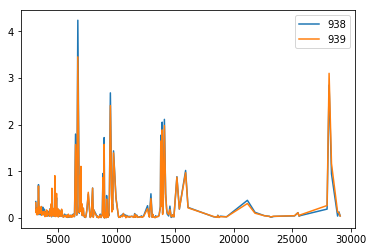

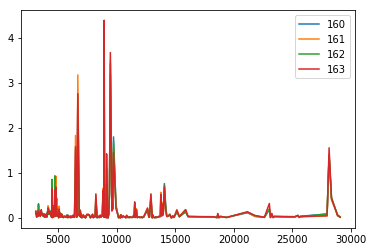

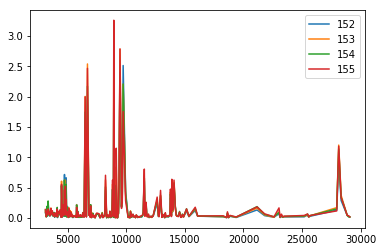

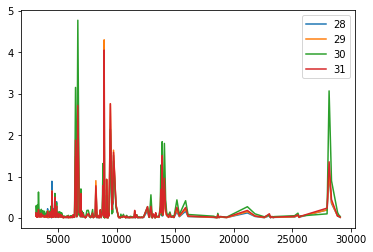

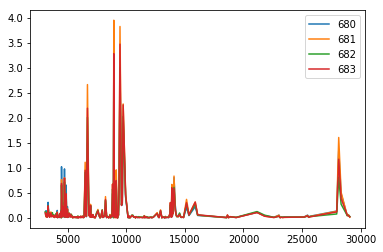

In [8]:
outfolder = 'D:\\SFL\\Biodesix\\figures\\'
random_rep = random.sample(ID, 5)
IDs = np.array(IDs)
for i in random_rep:
    inds = list(np.where(IDs == i)[0])
    to_plot = spectra.loc[inds,]
    to_plot = to_plot.T
    to_plot.plot()
    figname = outfolder + str(i) + '.png'
    plt.savefig(figname,bbox_inches='tight');

The duplicates are very similar to each other in location of the peaks. Height of peaks might differ from duplicate to duplicate.

In [9]:
# get only one replicate and build a dataset for training
ind = []
ID = list(ID)
IDs = np.array(IDs)
for id in ID:
    rep = np.min(np.where(IDs == id))
    ind.append(rep)
singles = spectra.loc[ind,]
singles.head()

,3085,3111,3137,3157,3177,3199,3217,3244,3267,3315,...,25185,25474,25570,25686,27963,28134,28339,28860,28973,29079
1044,0.099678,0.047751,0.116927,0.039526,0.030043,0.058471,0.171585,0.057669,0.043082,0.341127,...,0.032586,0.045375,0.032924,0.034578,0.075577,1.118683,0.416005,0.055911,0.035477,0.024455
1030,0.139243,0.063547,0.157796,0.041045,0.047849,0.090967,0.143752,0.092618,0.041851,0.344563,...,0.028470,0.045340,0.024601,0.038651,0.226919,1.269237,0.463850,0.028257,0.048812,0.023377
8,0.138695,0.069737,0.109057,0.035792,0.023654,0.074377,0.189231,0.110642,0.046127,0.419154,...,0.029635,0.089674,0.015002,0.039313,0.134966,1.333527,0.407463,0.051706,0.046999,0.020682
256,0.092795,0.077275,0.132343,0.032159,0.047856,0.061429,0.112699,0.103207,0.044658,0.195280,...,0.025984,0.067937,0.018166,0.028304,0.059028,0.972610,0.299164,0.038588,0.040129,0.017146
416,0.085356,0.042287,0.062836,0.016727,0.017813,0.043117,0.081208,0.075144,0.028457,0.188946,...,0.020408,0.038703,0.015315,0.025063,0.345120,0.482975,0.145823,0.017402,0.038195,0.014194


## Exploratory Data Analysis
### Correlation matrix of all features

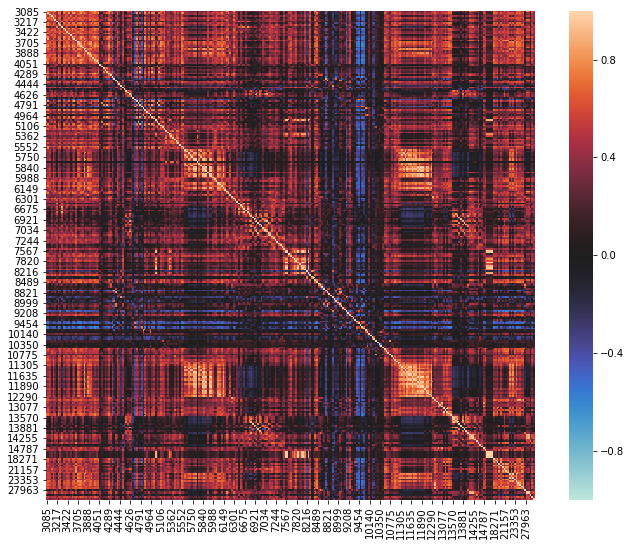

In [11]:
corrmat = singles.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square = True, center=0)

There seems to be highly correlated feature clusters.

### Feature Clustering

### Check whether the distribution of features are Gaussian

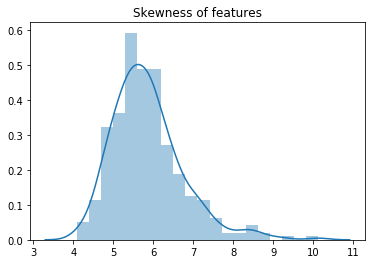

In [20]:
features = singles.columns
skew = singles[features].skew(axis=1)
sns.distplot(skew).set_title('Skewness of features');

Most of the features have large kurtosis, which means they do not form a Gaussian distribution. I randomly chose 6 features to plot their distribution.

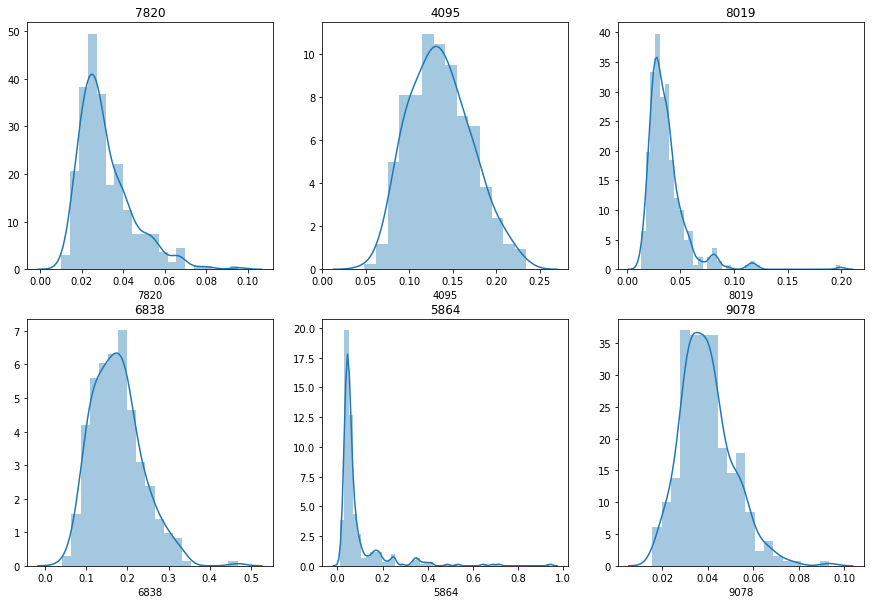

In [18]:
random_fea = random.sample(features, 6)
fig, ax =plt.subplots(2,3, figsize=(15,10))
for i in range(0,6):
    f = random_fea[i]
    g = sns.distplot(singles[f], ax=ax[i//3, i%3]).set_title(f)

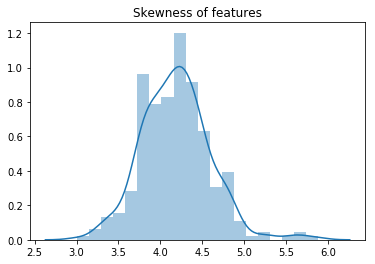

In [22]:
log_single = np.log1p(singles)
features = log_single.columns
skew = log_single[features].skew(axis=1)
sns.distplot(skew).set_title('Skewness of features');

## Classification

In [23]:
# Chosen classifier A as the gold truth for now
truth = indata.ClassifierA.values[ind]
truth[truth>0.5] = 1
truth[truth<=0.5] = 0

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

**Divide training and testing data set**

In [24]:
scaled = preprocessing.scale(singles)
X_train, X_test, Y_train, Y_test = train_test_split(scaled, truth, test_size=0.2, random_state=0)

### XGBoost Model

In [27]:
xgbmodel = XGBClassifier(max_depth=5)
kfold = KFold(n_splits=5, random_state=0)
results = cross_val_score(xgbmodel, X_train, Y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

Accuracy: 77.56% (6.85%)


D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
xgbmodel.fit(X_train, Y_train)
y_pred = xgbmodel.predict(X_test)
f1 = f1_score(Y_test, y_pred)
print f1

0.8648648648648648


D:\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### SVM Model

In [31]:
svmModel = svm.SVC(gamma='scale', kernel='rbf')
svmModel.fit(X_train, Y_train)
y_pred = svmModel.predict(X_test)
f1 = f1_score(Y_test, y_pred)
print f1

TypeError: a float is required